In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

num_topics = 16

In [2]:
path=f"~/Desktop/R_js/data1/gamma/pro{num_topics}_gamma.csv"
df = pd.read_csv(path)


In [3]:
df.head()

,document,topic,gamma
0,1,1,0.018924
1,2,1,0.034041
2,3,1,0.049521
3,4,1,0.028633
4,5,1,0.028980


# Gamma Distribution

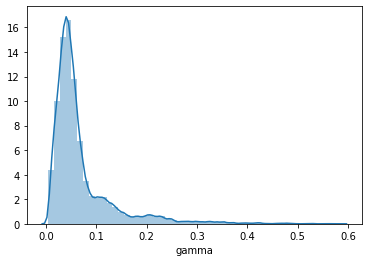

In [5]:
sns.distplot(df[df.topic==14]['gamma'])

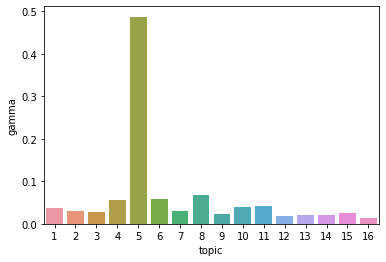

In [7]:
doc = 160
sns.barplot(df[df.document == doc]['topic'], df[df.document == doc]['gamma'])

# Topic Proportions

In [42]:
# df[df.topic == 6]['gamma'].mean()


props = []
for i in range(num_topics):
    props.append([str(i+1), df[df.topic == i+1]['gamma'].mean()])

df_prop = pd.DataFrame(props, columns = ["topic_num", "topic_prop"])
df_prop.head()

,topic_num,topic_prop
0,1,0.065207
1,2,0.041748
2,3,0.073033
3,4,0.041516
4,5,0.095124


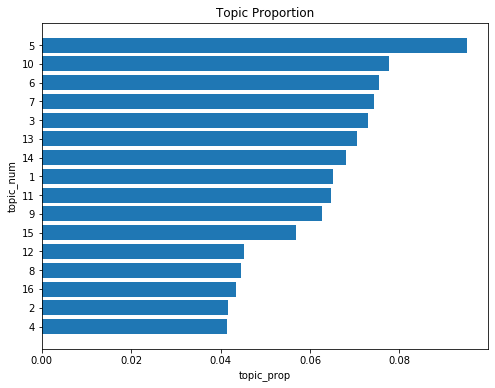

In [63]:

plt.figure(figsize=(8,6))
df_prop = df_prop.sort_values(by="topic_prop", ascending=True)
plt.barh(df_prop["topic_num"], df_prop["topic_prop"])
plt.xlabel('topic_prop')
plt.ylabel('topic_num')
plt.title('Topic Proportion')
plt.show()

# Topic Word Distribution

In [65]:
path=f"~/Desktop/R_js/data1/beta/pro{num_topics}_beta.csv"
df_beta = pd.read_csv(path)
df_beta.head()

,topic,term,beta
0,1,1_hour_break,4.443760e-301
1,2,1_hour_break,0.000000e+00
2,3,1_hour_break,1.693463e-285
3,4,1_hour_break,5.632717e-231
4,5,1_hour_break,0.000000e+00


In [67]:
df_prune = df_beta[df_beta.topic == 1].sort_values(by="beta", ascending=False)[:10]

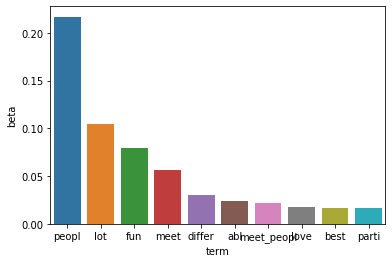

In [69]:
sns.barplot(x = "term", y = "beta", data = df_prune)
plt.show()

In [70]:
df = df_beta.copy()

topic_word_distr = []
imp_words = []
imp_word_prob = []
terms = df[df.topic == 1].term.values.tolist()

num_topics = len(df.topic.unique())
for i in range(1, num_topics+1):
    topic = df[df.topic == i] 
    vals = topic.beta.values.tolist()
    topic_word_distr += [np.asarray(vals)]
    words = [terms[i] for i in np.asarray(vals).argsort()[-10:][::-1].tolist()]
    word_prob = [np.round(vals[i], 2) for i in np.asarray(vals).argsort()[-10:][::-1].tolist()]
    imp_words.append(words)
    imp_word_prob.append(word_prob)
    
# print(len(topic_word_distr))
# print(len(imp_words))

# print(imp_words)
# print(imp_word_prob)

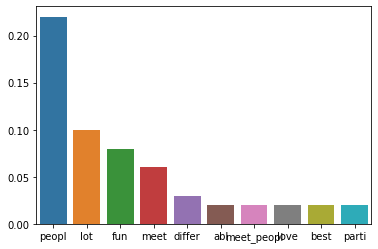

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(imp_words[0], imp_word_prob[0])
plt.show()

In [106]:
from bokeh.plotting import figure, show, output_notebook, save, output_file
from bokeh.models import HoverTool, value, LabelSet, Legend, ColumnDataSource
from bokeh.io import export_png
output_notebook()

Loading BokehJS ...

In [107]:
import math
df_ = pd.DataFrame()
df_["x"] = imp_words[0]
df_["top"] = imp_word_prob[0]

source = ColumnDataSource(dict(
    x=df_['x'],
    top=df_['top']
))

# p = figure(plot_width=1000, plot_height=700,
#                      title=title, tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
#                      x_axis_type=None, y_axis_type=None, min_border=1)

p = figure(x_range=imp_words[0], plot_height=250, plot_width=400, title="Top Ten Words",
           toolbar_location=None, tools="hover")

p.vbar(x='x', top= 'top', width=0.8, source=source)#'msize', )

# hover tools
hover = p.select(dict(type=HoverTool))
hover.tooltips = { "Prob": "@top"}
p.xaxis.major_label_orientation = math.pi/2
# plot_lda.legend.location = "top_left"

show(p)

In [115]:
from bokeh.layouts import gridplot
from bokeh.models.annotations import Title
from bokeh.io import export_png

fs = []
for i in range(num_topics):
    df_ = pd.DataFrame()
    df_["x"] = imp_words[i]
    df_["top"] = imp_word_prob[i]
    
    source = ColumnDataSource(dict(
        x=df_['x'],
        top=df_['top']
    ))
    
    p = figure(x_range=df_["x"], plot_height=250, plot_width=400, title=f"Topic: {i+1}",
           toolbar_location=None, tools="hover", x_axis_label="Terms", y_axis_label="Term-Prob")
    p.vbar(x='x', top= 'top', width=0.8, source=source)
    hover = p.select(dict(type=HoverTool))
    hover.tooltips = { "Prob": "@top"}
    p.xaxis.major_label_orientation = math.pi/2
    p.title.align = "center"
    fs.append(p)

t = Title()
t.text = 'Topic-Term Probability'
plt.suptitle("Topic-Term Probability")
# plt.show()
show(gridplot(fs, ncols=2))
# output_file("test.html")
import os

# root = os.path.expanduser("~")
# path = root + "/Desktop/R_js/img/pros/bar.png"
# export_png(plt, filename=path)


<Figure size 432x288 with 0 Axes>

# Hierarchical Clustering

In [87]:
# num_topics = 16
df = pd.read_csv(f"~/Desktop/R_js/data1/beta/pro{num_topics}_beta.csv")

In [88]:
df.head()

,topic,term,beta
0,1,1_hour_break,4.443760e-301
1,2,1_hour_break,0.000000e+00
2,3,1_hour_break,1.693463e-285
3,4,1_hour_break,5.632717e-231
4,5,1_hour_break,0.000000e+00


In [89]:
topic_word_distr = []
imp_words = []
terms = df[df.topic == 1].term.values.tolist()

num_topics = len(df.topic.unique())

for i in range(1, num_topics+1):
    topic = df[df.topic == i] 
    vals = topic.beta.values.tolist()
    topic_word_distr += [np.asarray(vals)]
    words = [terms[i] for i in np.asarray(vals).argsort()[-10:][::-1].tolist()]
    imp_words.append(words)
    
print(len(topic_word_distr))
print(len(imp_words))


16
16


In [90]:
from scipy.spatial import distance
# import scipy

dist = []
for i in range(num_topics): 
    t1 = topic_word_distr[i]
    d1 = []
    for j in range(num_topics):
        t2 = topic_word_distr[j]
        d = distance.jensenshannon(t1, t2)
        d1.append(d)
    dist.append(d1)

print(dist)

[[0.0, inf, inf, inf, inf, inf, inf, 0.8320041574735262, inf, 0.83241516788048, inf, inf, inf, inf, inf, 0.8317131581781076], [inf, 0.0, 0.8321510639271059, 0.830746994435888, inf, inf, inf, 0.8318968993283732, inf, inf, inf, inf, inf, inf, inf, 0.8317036099812292], [inf, 0.8321510639271059, 0.0, inf, 0.8324766704918531, inf, inf, 0.8324768012220044, inf, inf, inf, inf, inf, inf, inf, inf], [inf, 0.830746994435888, inf, 0.0, 0.8320672013953118, inf, inf, 0.8323237411236151, 0.8301030610348346, 0.8320602147982433, 0.8325149998412377, inf, inf, inf, 0.8324416674272346, inf], [inf, inf, 0.8324766704918531, 0.8320672013953118, 0.0, inf, inf, inf, 0.8318125706383528, inf, 0.8323137976550453, inf, inf, 0.8319785256189793, 0.8311171130100422, 0.8322892853933841], [inf, inf, inf, inf, inf, 0.0, inf, 0.8316465019834358, inf, 0.8317515151195622, 0.832336999490058, inf, inf, 0.8324342971843687, inf, inf], [inf, inf, inf, inf, inf, inf, 0.0, inf, inf, inf, inf, inf, inf, inf, inf, inf], [0.8320041

In [91]:
from sklearn.metrics.pairwise import cosine_similarity
import math

cos_sim = cosine_similarity(topic_word_distr, topic_word_distr)
# cos_sim = [['{:f}'.format(item) for item in item_array] for item_array in cos_sim]
# cos_sim = np.array(cos_sim)
np.set_printoptions(suppress=True)
cos_sim = np.round(cos_sim, 2)
print((len(cos_sim[0])))

16


In [92]:
# import scipy.cluster.hierarchy as shc
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 7))
# plt.title(" Dendograms")
# dend = shc.dendrogram(shc.linkage(cos_sim, method='ward'))

In [98]:
import os

home = os.path.expanduser("~")
os.path.exists(home + "/Desktop")

True

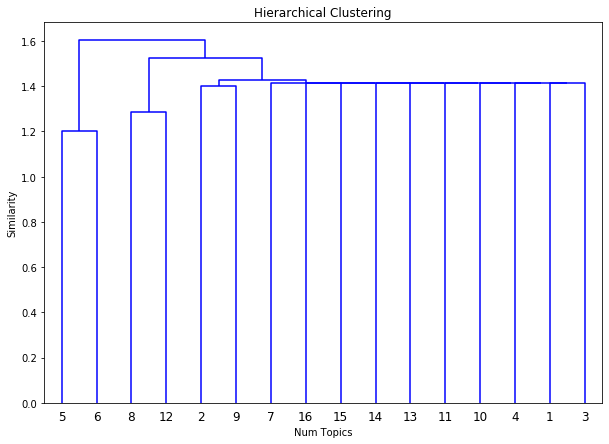

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
# from scipy.cluster import hierarchy 

# hierarchy.set_link_color_palette(['C0'])

linked = linkage(cos_sim, 'ward')

labelList = range(1, num_topics+1)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            show_leaf_counts=True)
plt.xlabel("Num Topics")
plt.ylabel("Similarity")
plt.title("Hierarchical Clustering")
# plt.show()

plt.savefig(home + "/Desktop/R_js/img/pros/hier.png")


